In [3]:
from typing import TypedDict
from langgraph.graph import StateGraph, START, END

In [4]:
class AgentState(TypedDict):
    num1: int
    num2: int
    operation: str
    result: int

In [5]:
def adder(state: AgentState) -> AgentState:
    """Adds two numbers and stores the result in the state."""
    state['result'] = state['num1'] + state['num2']
    return state

def subtractor(state: AgentState) -> AgentState:
    """Subtracts the second number from the first and stores the result in the state."""
    state['result'] = state['num1'] - state['num2']
    return state

def decider(state: AgentState) -> AgentState:
    """Decides which operation to perform based on the 'operation' field in the state."""
    if state['operation'] == '+':
        return "addition_operation"
    elif state['operation'] == '-':
        return "subtraction_operation"

In [7]:
graph = StateGraph(AgentState)

graph.add_node("addition_node", adder)
graph.add_node("subtraction_node", subtractor)
graph.add_node("rooter_node", lambda state: state) # pass-through function

graph.add_edge(START, "rooter_node")

graph.add_conditional_edges(
    "rooter_node", # this is the node with the decision-making logic
    decider, # the decision function
    {
        "addition_operation": "addition_node",
        "subtraction_operation": "subtraction_node"
    } # mapping of decision outcomes to node names
)

# Basically "rooter_node" is the node that decides which path using the decider function
# If decider returns "addition_operation", it goes to "addition_node"
# If decider returns "subtraction_operation", it goes to "subtraction_node"
# rooter_node is a pass-through node that just forwards the state as is

graph.add_edge("addition_node", END)
graph.add_edge("subtraction_node", END)

app = graph.compile()



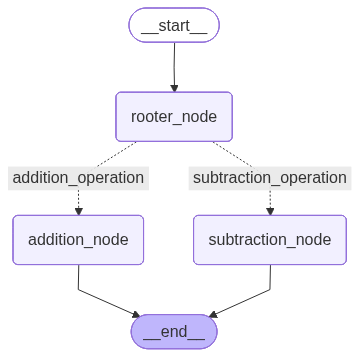

In [8]:
from IPython.display import display, Image
display(Image(app.get_graph().draw_mermaid_png()))

In [9]:
initial_state: AgentState = {
    "num1": 10,
    "num2": 5,
    "operation": "-",
}

result = app.invoke(initial_state)
print(result)

{'num1': 10, 'num2': 5, 'operation': '-', 'result': 5}
